<a href="https://colab.research.google.com/github/dzkmrn/2141720076-pcvk-2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Week 10**

### Muhammad Dzaka Murran Rusid | 2141720076 | TI-3H



## D. LATIHAN PRAKTIKUM

### Soal No. 1
Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

### Soal No. 2
Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


## **Object Detection**

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
# Impor librar yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


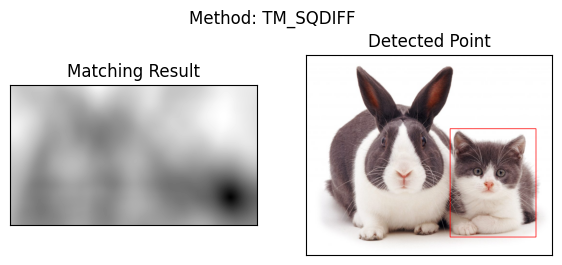

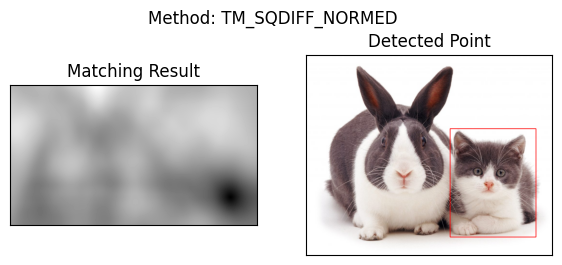

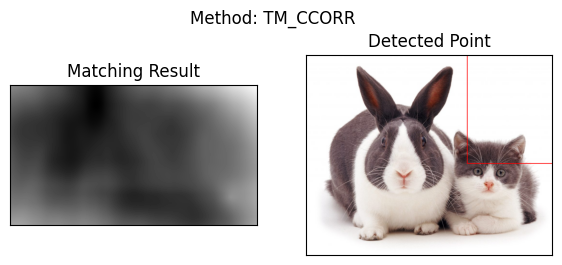

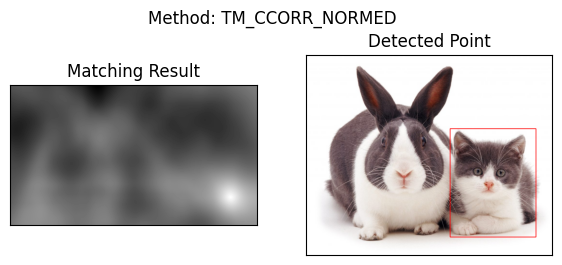

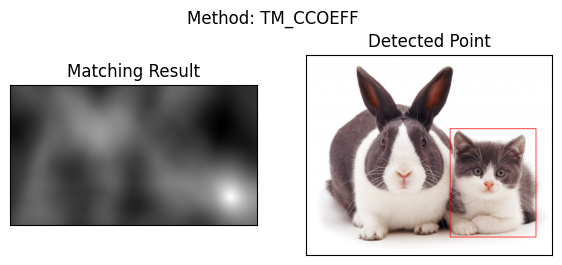

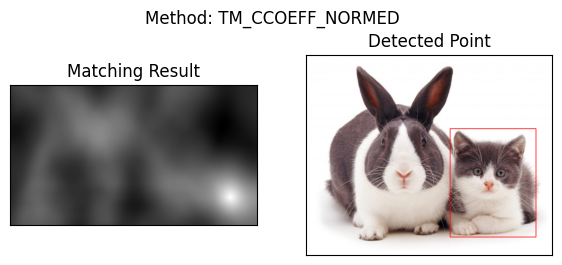

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image and template
img = cv2.imread('/content/drive/MyDrive/pcvk/minggu11/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/pcvk/minggu11/cat2_templatejpg.jpg')

# Convert images to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Ensure the template is not empty
if template is None:
    print("Template not found. Make sure the 'cat2_templatejpg.jpg' file is in the same directory.")
else:
    # Template size
    w, h = template_gray.shape[::-1]

    # List of template matching methods
    methods = [
        ('TM_SQDIFF', cv2.TM_SQDIFF),
        ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
        ('TM_CCORR', cv2.TM_CCORR),
        ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
        ('TM_CCOEFF', cv2.TM_CCOEFF),
        ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED)
    ]

    # Loop through all methods
    for method_name, method in methods:
        img_copy = img.copy()

        # Apply template matching
        res = cv2.matchTemplate(img_gray, template_gray, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take the minimum value
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Draw a rectangle around the matched area with red color
        cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

        # Display the results
        plt.figure(figsize=(7, 3))

        plt.subplot(121)
        plt.imshow(res, cmap='gray')
        plt.title('Matching Result')
        plt.xticks([]), plt.yticks([])

        plt.subplot(122)
        plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
        plt.title('Detected Point')
        plt.xticks([]), plt.yticks([])

        plt.suptitle(f"Method: {method_name}")
        plt.show()


### Soal No. 3
Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

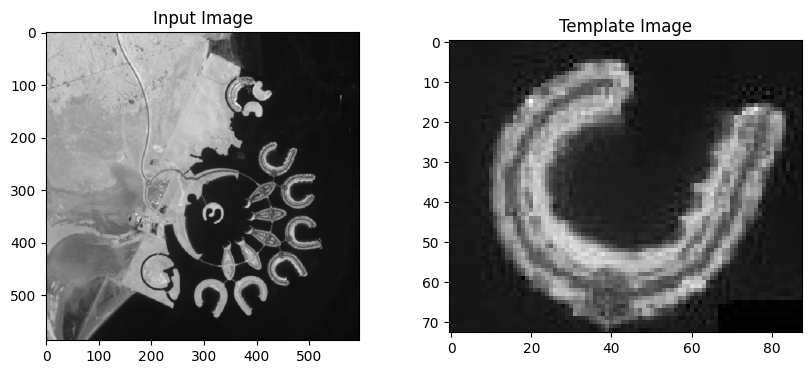

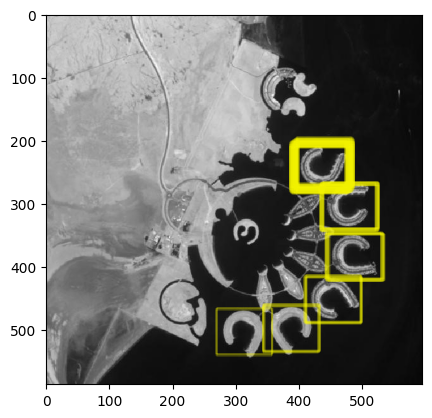

In [8]:
import cv2
import numpy as np
from skimage.feature import match_template
import matplotlib.pyplot as plt

# Load the input image and template
main_image = cv2.imread('/content/drive/MyDrive/pcvk/minggu11/bahrain.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('/content/drive/MyDrive/pcvk/minggu11/bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

# print input image dan template
f, axarr = plt.subplots(1, 2, figsize=(10, 4))
axarr[0].imshow(main_image, cmap='gray')
axarr[0].set_title("Input Image")
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title("Template Image")

# Hitung kemiripan citra dengan citra template
result = match_template(main_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(main_image, cmap='gray')

height, width = template.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

### Soal No. 4
Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

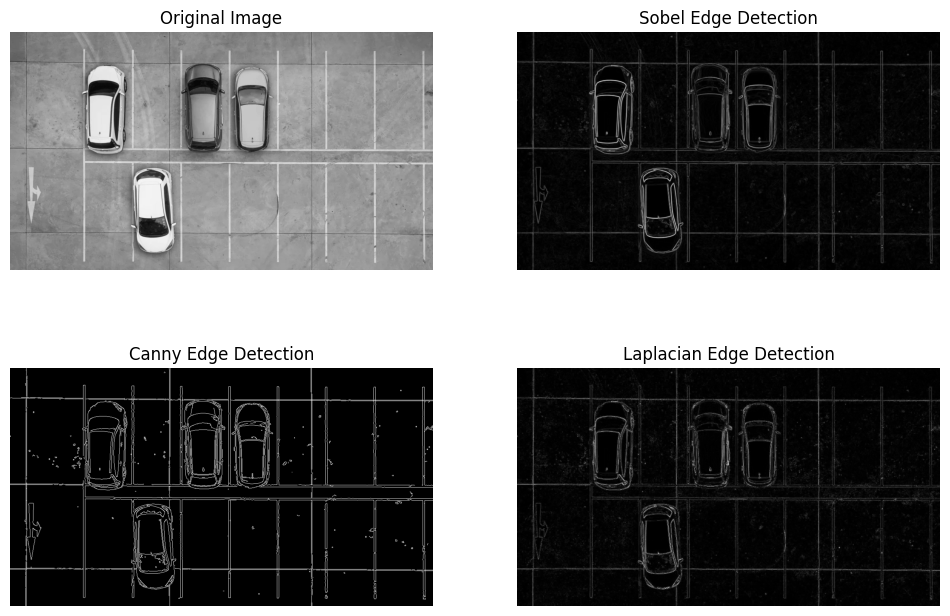

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
img_path = '/content/drive/MyDrive/pcvk/minggu11/car-park.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny_edges = cv2.Canny(img, 100, 200)

# Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(img, cv2.CV_64F)

# Enhance Laplacian visualization
laplacian_edges_vis = cv2.convertScaleAbs(laplacian_edges)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges_vis, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

### Soal No. 5
Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

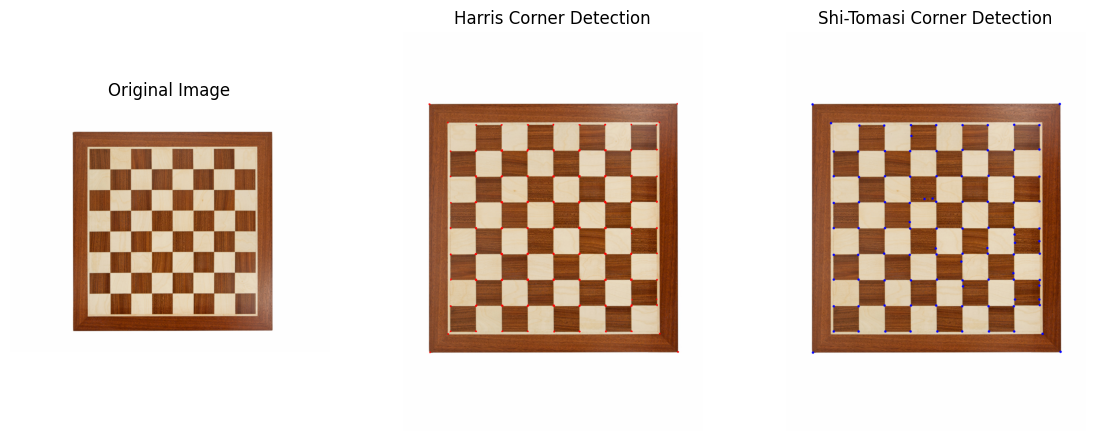

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img_path = '/content/drive/MyDrive/pcvk/minggu11/chess-board.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Draw Harris Corners on the image
img_harris = img.copy()
img_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Draw Shi-Tomasi Corners on the image
img_shi_tomasi = img.copy()
shi_tomasi_corners = np.int0(shi_tomasi_corners)
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(img_shi_tomasi, (x, y), 3, 255, -1)

# Rotate the images for vertical display
img_harris = cv2.rotate(img_harris, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_shi_tomasi = cv2.rotate(img_shi_tomasi, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Display the results
plt.figure(figsize=(14, 8))

plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(img_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.show()

### Soal No. 6
Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

Number of Hough lines: 33
Number of filtered lines: 20


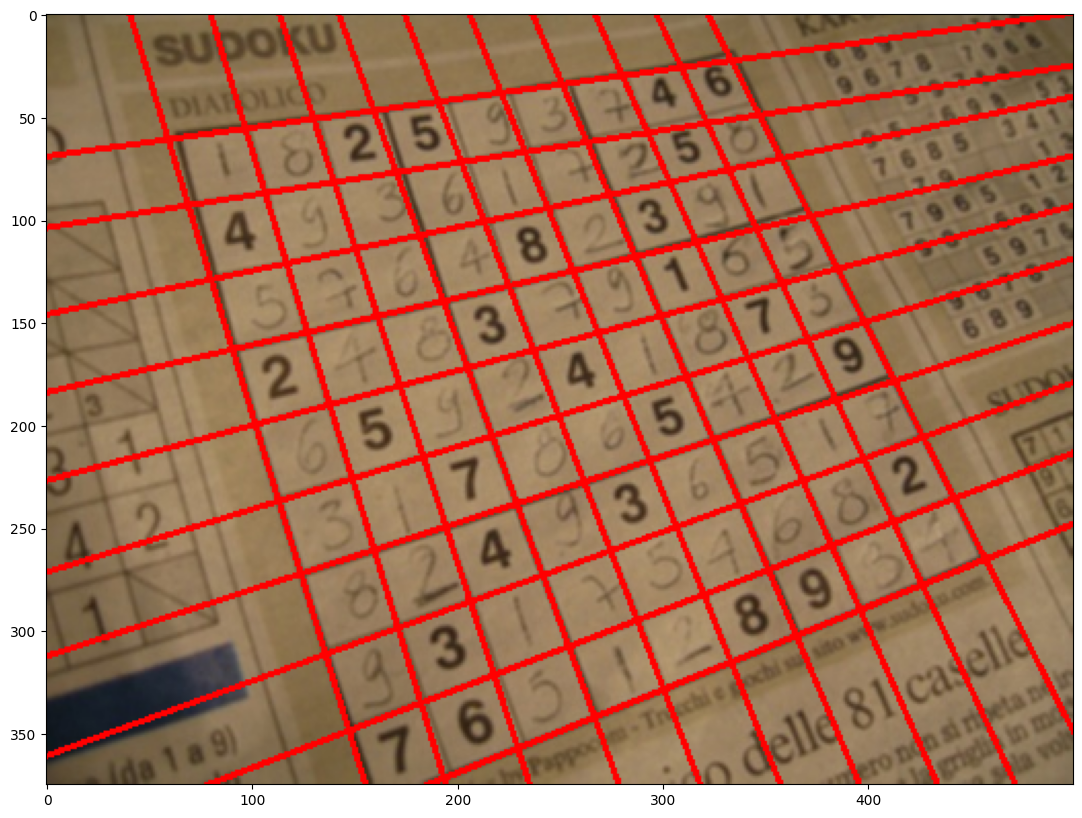

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load citra input
input_img = cv.imread('/content/drive/MyDrive/pcvk/minggu11/sudoku.jpg')

# Konversi citra menjadi citra grayscale
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# Deteksi tepi dengan Canny
edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

# Dilasi untuk meningkatkan deteksi tepi
kernel_dilate = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel_dilate, iterations=1)

# Erosi untuk mengurangi noise
kernel_erode = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel_erode, iterations=1)

# Transformasi Hough untuk mendeteksi garis
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

if not lines.any():
    print('No lines were found')
    exit()

# Filtering garis-garis yang sejajar atau mendekati sejajar
rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue
        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue
    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

print('Number of Hough lines:', len(lines))

filtered_lines = []

for i in range(len(lines)):
    if line_flags[i]:
        filtered_lines.append(lines[i])

print('Number of filtered lines:', len(filtered_lines))

# Gambar garis yang terdeteksi pada citra asli
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.show()

### Soal No. 7
Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

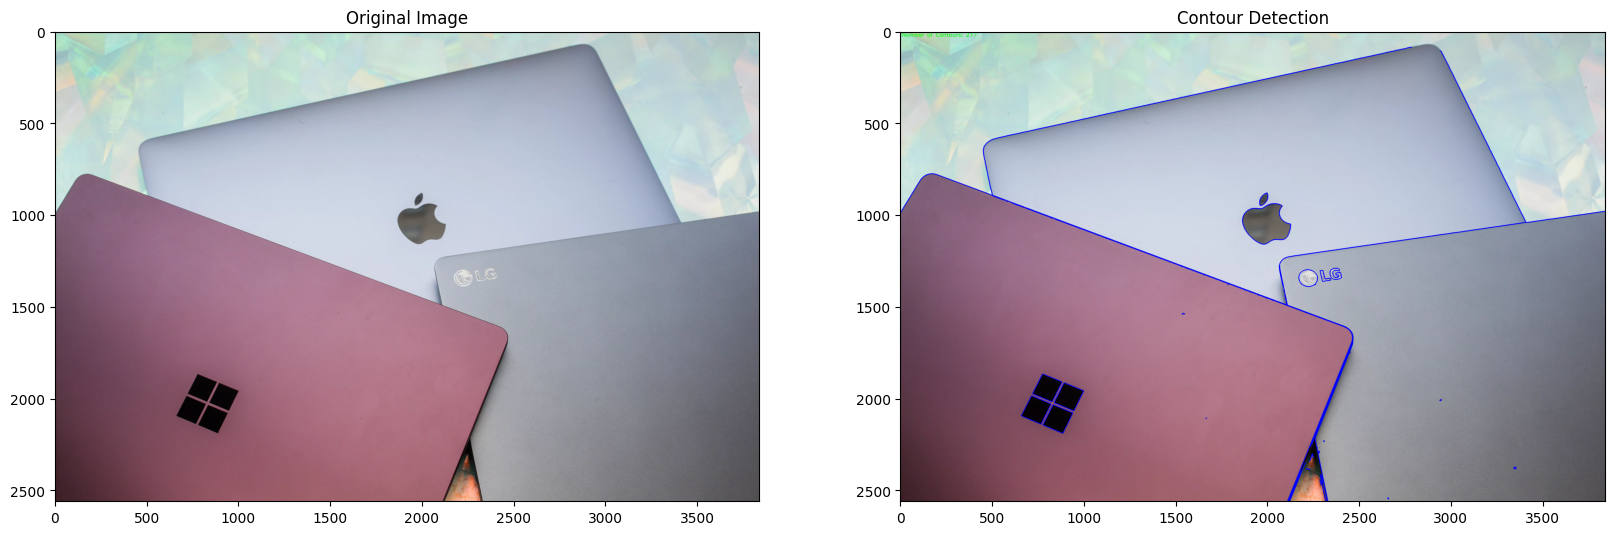

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load citra input
img = cv2.imread('/content/drive/MyDrive/pcvk/minggu11/laptop.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi tepi dengan Canny
edged = cv2.Canny(img_gray, 30, 200)

# Temukan kontur pada citra biner
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Gambar kontur pada citra asli
contour_image = img.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 3)

# Hitung jumlah kontur dan tampilkan informasi
num_contours = len(contours)
text = f'Number of Contours: {num_contours}'
cv2.putText(contour_image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Tampilkan hasil
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')

plt.show()


## E. Pengayaan Materi KTP

1. siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban, dan jangan lupa untuk import library


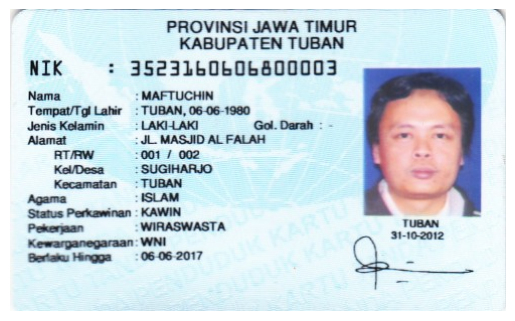

In [11]:
img = cv.imread('/content/drive/MyDrive/pcvk/ktp/ktp3.png')

plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

2. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebu

In [12]:
import cv2
import os

In [14]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/pcvk/ktp"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

In [16]:
# Lokasi hasil pemotongan gambar KTP
path_plate = "/content/drive/MyDrive/pcvk/ktp"

# List untuk menyimpan nama file di direktori
file_names = []

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    # Mendapatkan path lengkap file
    file_path = os.path.join(path_plate, name_file)

    # Membaca gambar dari file
    src = cv2.imread(file_path)

    # Operasi lain yang ingin Anda lakukan pada gambar
    blurred = src.copy()
    gray = blurred.copy()

    # Menambahkan nama file ke dalam list
    file_names.append(name_file)

# Menampilkan daftar nama file
for file_name in file_names:
    print("Nama file:", file_name)

Nama file: KTP7.jpeg
Nama file: ktp.png
Nama file: ktp1.png
Nama file: ktp2.png
Nama file: ktp3.png
Nama file: ktp4.png
Nama file: ktp5.png
Nama file: ktp6.png
Nama file: ktporang.jpeg


3. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [17]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(img, (5, 5), 0.5)

4. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)


168.0 (300, 493)


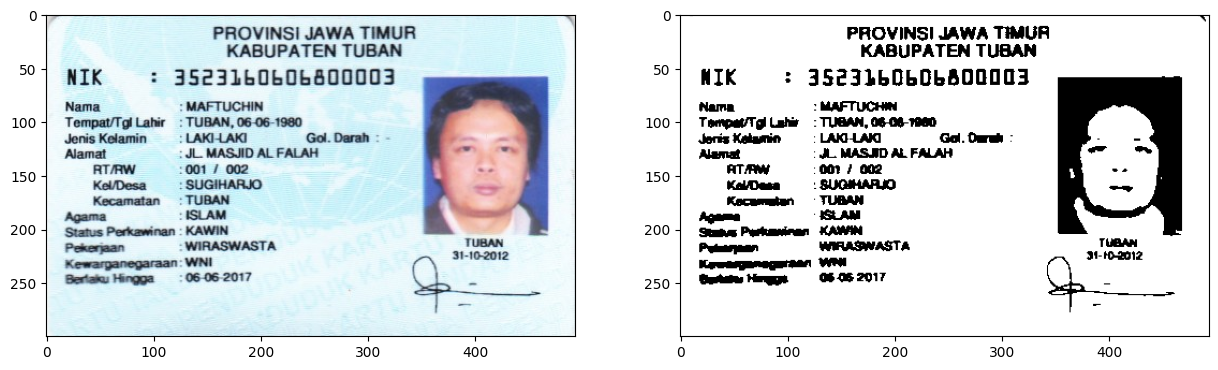

In [18]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

5. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan

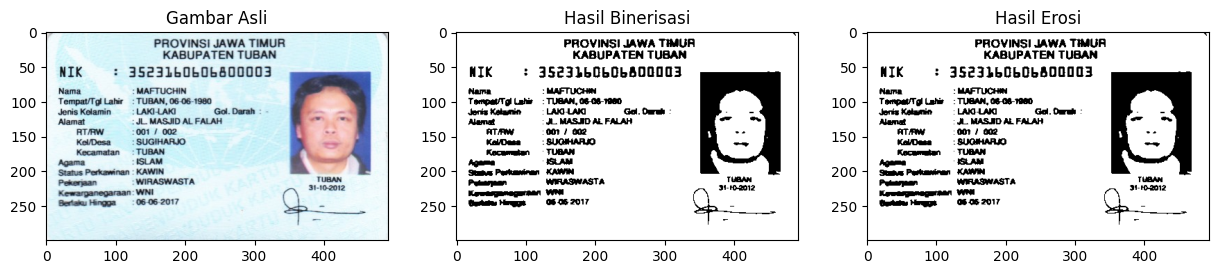

In [19]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

6. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda)

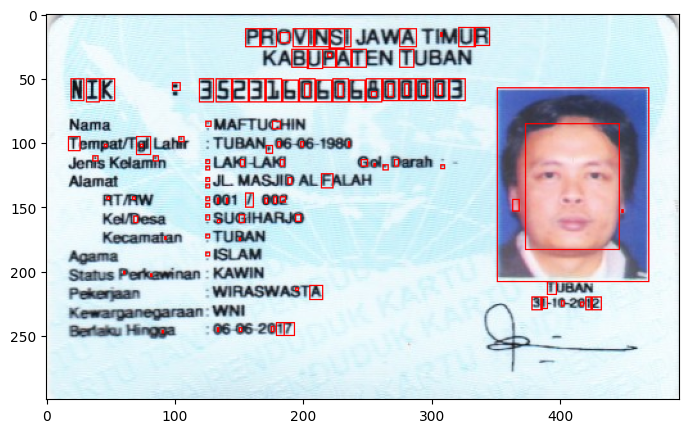

In [20]:
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Tugas Praktikum Kelompok (Kelompok 5)

### KTP Widiarso Bekasi

### Langkah 1: Load Data

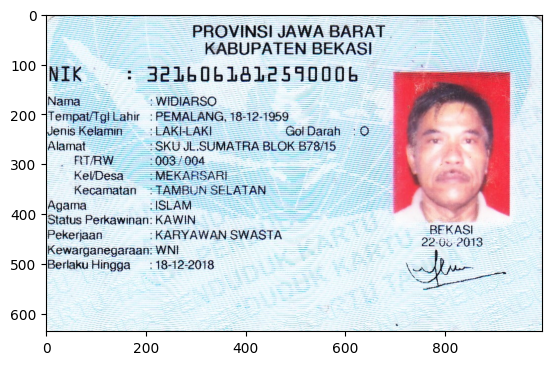

In [21]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/pcvk/ktp/ktp6.png')
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

### Langkah 2: Lakukan Preprocessing (denoised)


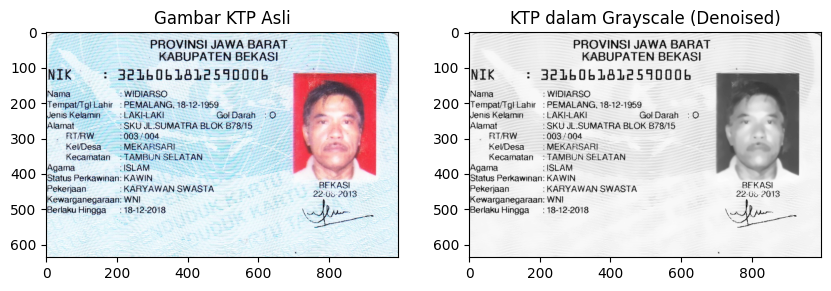

In [22]:
import cv2
ktp_denoised = cv2.fastNlMeansDenoisingColored(ktp, None, h=7)
ktp_image_gray = cv2.cvtColor(ktp_denoised, cv2.COLOR_RGB2GRAY)

# Tampilkan gambar sejajar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Gambar KTP Asli')

plt.subplot(1, 2, 2)
plt.imshow(ktp_image_gray, cmap='gray')
plt.title('KTP dalam Grayscale (Denoised)')

plt.show()

### Langkah 3: Operasi morfologi erosi untuk ekstraksi kontur



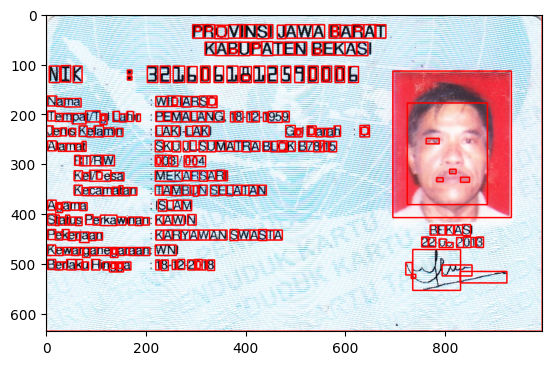

In [23]:
# Binarisasi menggunakan metode Otsu
ret, bw = cv2.threshold(ktp_image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()

Langkah 4: Lakukan ekstraksi karakter menggunakan modul python tesseract

##### Install terlebih dahulu

In [24]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 2s (2,948 kB/s)
debconf: unable to ini

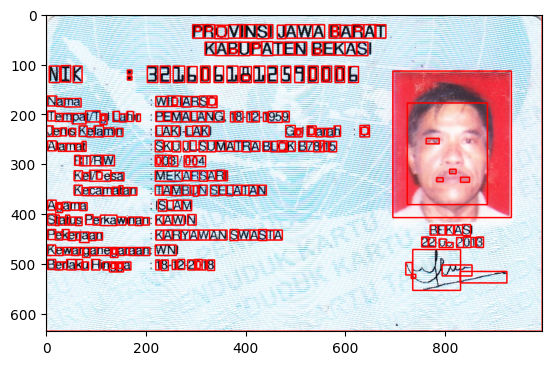

Hasil Pembacaan Teks:
PROVINSI JAWA BARAT
KABUPATEN BEKASI
NIK > 3J2Lb0b18612e590006 7
Nama : WIDIARSO
Tempai/TgiLahir : PEMALANG, 18-12-1959
Jenis Kelamin : LAKI-LAKI Gol Darah : 0 ’
Alamat = SKU JL.LSUMATRA BLOK B78/15 7
_ RIRW +6037004 :
KelDesa = MEKARSARI : = ;
Kecamatan =TAMBUN SELATAN
Agama ISLAM '
Status Perkawinan: KAWIN
Pekerjaan - KARYAWAN SWASTA =
Kewarganegaraan: WNI
Berlaku Hingga __: 18-12-2018 Soe
= a



In [25]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Baca gambar KTP
ktp = cv2.imread('/content/drive/MyDrive/pcvk/ktp/ktp6.png')
ktp_denoised = cv2.fastNlMeansDenoisingColored(ktp, None, h=7)
ktp_image_gray = cv2.cvtColor(ktp_denoised, cv2.COLOR_RGB2GRAY)

# Binarisasi menggunakan metode Otsu
ret, bw = cv2.threshold(ktp_image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()

# Menjalankan PyTesseract untuk membaca teks
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(ktp_image_gray, config=custom_config)

# Tampilkan hasil pembacaan teks
print("Hasil Pembacaan Teks:")
print(text)